## COP and COG estimation by derivative method
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the next function:
COP= COG-(4/g*3*d²derivadasegundaTeta)

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [1]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [2]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Thu Dec 16 13:54:10 2021 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [3]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

## Subject 150

In [6]:
fname_grf = os.path.join(path2, PDSinfo.Trial[150] + 'grf' + '.txt') 
fname_mkr = os.path.join(path2, PDSinfo.Trial[150] + 'mkr' + '.txt')
grf1 = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
mkr1 = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')

To calculate the distance in the equation we did the square root of the sum of COG in the 3 dimensions sqaured:

In [7]:
COGX1=mkr1['COG_X']
COGY1=mkr1['COG_Y']
COGZ1=mkr1['COG_Z']
d1= (COGX1**2+COGY1**2+COGZ1**2)**0.5

Para calcularmos a derivada do ângulo primeiro precisamos achar o próprio ângulo que será dado pelo arcsen(COG/d)

In [8]:
angulox= np.arcsin(COGX1/d1)
anguloz=np.arcsin(COGZ1/d1)
matrizangx=np.array(angulox[30:])
matrizangz=np.array(anguloz[30:])

Para chegarmos na primeira derivada devemos usar a seguinte fórmula 
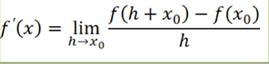, onde h+x0 seria a próxima posição, xo a posição em questão e h a variação do tempo

In [9]:
t=grf1['Time']
dt=t[1]-t[0]
d1x=np.zeros(len(matrizangx))
d1z=np.zeros(len(matrizangz))
for i  in range(0,len(matrizangx)-1):
    prox=i+1
    d1x[i]=(matrizangx[prox]-matrizangx[i])/dt
    d1z[i]=(matrizangz[prox]-matrizangz[i])/dt
print(d1x)

[-0.00714961 -0.00690753 -0.00656982 ... -0.00207621 -0.00217171
  0.        ]


Fazemos então a segunda derivada:

In [10]:
d2x=np.zeros(len(d1x))
d2z=np.zeros(len(d1z))
for i in range(0,30):
    prox=i+1
    d2x[i]=(d1x[i+1]-d1x[i])/dt
    d2z[i]=(d1z[i+1]-d1z[i])/dt
print(d2x)

[0.02420806 0.03377094 0.02642648 ... 0.         0.         0.        ]


Com as derivadas feitas, precisamos fazer a função em si:

In [11]:
COPX1= COGX1[30:] - (4/3)*(d1[30:]**4)*(1/9.8)*d2x
COPZ1= COGZ1[30:] - (4/3)*(d1[30:]**4)*(1/9.8)*d2z

Para fazer o gráfico comparando o real e o estimado primeiro precisamos do real:

In [12]:
COPXreal1=grf1['COPNET_X']
COPZreal1=grf1['COPNET_Z']

Text(0, 0.5, 'COP')

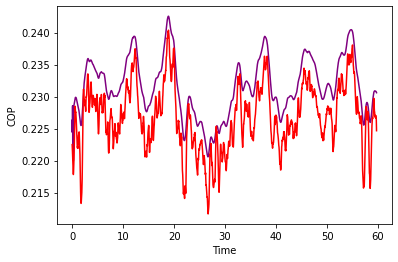

In [13]:
plt.plot(t[:-30],COPX1,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal1[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [14]:
COPX1med=np.mean(COPX1)
COPX1realmed=np.mean(COPXreal1)
ex1=np.sqrt((COPX1med-COPX1realmed)**2)
print(ex1)

0.004952826159672963


Text(0, 0.5, 'COP')

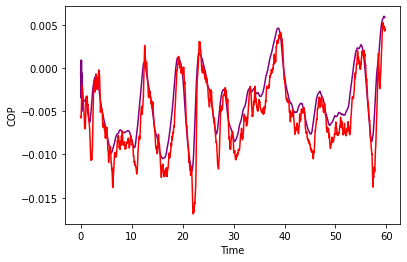

In [15]:
plt.plot(t[:-30],COPZ1,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal1[:-30],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [16]:
COPZ1med=np.mean(COPZ1)
COPZreal1med=np.mean(COPZreal1)
ez1=np.square((COPZ1med-COPZreal1med)**2)
print(ez1)

4.253399800316087e-12


Now we do the same for other 9 subjects

## Subject 44

In [17]:
fname_grf2 = os.path.join(path2,PDSinfo.Trial[44]+'grf'+'.txt')
fname_mkr2 = os.path.join(path2,PDSinfo.Trial[44]+'mkr'+'.txt')
grf2=pd.read_csv(fname_grf2, delimiter='\t',header=0,engine='c')
mkr2=pd.read_csv(fname_mkr2, delimiter='\t', header=0, engine='c')

In [18]:
COGX2=mkr2['COG_X']
COGY2=mkr2['COG_Y']
COGZ2=mkr2['COG_Z']
d2=(COGX2**2+COGY2**2+COGZ2**2)**0.5

In [19]:
angulox2=np.arcsin(COGX2/d2)
anguloz2=np.arcsin(COGZ2/d2)
matrizangx2=np.array(angulox2[30:])
matrizangz2=np.array(anguloz2[30:])

In [20]:
t=grf2['Time']
dt=t[1]-t[0]
d1x2=np.zeros(len(matrizangx2))
d1z2=np.zeros(len(matrizangz2))
for i in range(0,len(matrizangx2)-1):
    prox=i+1
    d1x2[i]=(matrizangx2[prox]-matrizangx2[i])/dt
    d1z2[i]=(matrizangz2[prox]-matrizangz2[i])/dt

In [21]:
d2x2=np.zeros(len(d1x2))
d2z2=np.zeros(len(d1z2))
for i in range(0,30):
    prox=i+1
    d2x2[i]=(d1x2[prox]-d1x2[i])/dt
    d2z2[i]=(d1z2[prox]-d1z2[i])/dt

In [22]:
COPX2= COGX2[30:] -(4/3)*(d2[30:]**4)*(1/9.8)*d2x2
COPZ2= COGZ2[30:] -(4/3)*(d2[30:]**4)*(1/9.8)*d2z2

In [23]:
COPXreal2=grf2['COPNET_X']
COPZreal2=grf2['COPNET_Z']

Text(0, 0.5, 'COP')

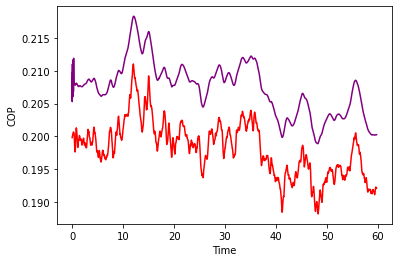

In [24]:
plt.plot(t[:-30],COPX2,marker='', color='purple', linestyle='-')
plt.plot(t[:-30],COPXreal2[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [25]:
COPX2med=np.mean(COPX2)
COPXreal2med=np.mean(COPXreal2)
ex2=np.sqrt((COPX2med-COPXreal2med)**2)
print(ex2)

0.009163029294552927


Text(0, 0.5, 'COP')

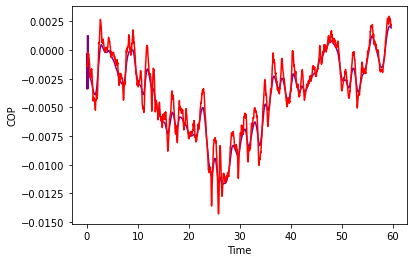

In [26]:
plt.plot(t[:-30],COPZ2,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal2[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [27]:
COPZ2med=np.mean(COPZ2)
COPZreal2med=np.mean(COPZreal2)
ez2=np.sqrt((COPZ2med-COPZreal2med)**2)
print(ez2)

0.0003221783166044061


## Subject 5

In [28]:
fname_grf3=os.path.join(path2,PDSinfo.Trial[5] + 'grf'+'.txt')
fname_mkr3=os.path.join(path2,PDSinfo.Trial[5]+'mkr'+'.txt')
grf3=pd.read_csv(fname_grf3, delimiter='\t',header=0, engine='c')
mkr3=pd.read_csv(fname_mkr3, delimiter='\t', header=0, engine='c')

In [29]:
COGX3=mkr3['COG_X']
COGY3=mkr3['COG_Y']
COGZ3=mkr3['COG_Z']
d3=(COGX3**2+COGY3**2+COGZ3**2)**0.5

In [30]:
angulox3=np.arcsin(COGX3/d3)
anguloz3=np.arcsin(COGZ3/d3)
matrizangx3=np.array(angulox3[30:])
matrizangz3=np.array(anguloz3[30:])

In [31]:
t3=grf3['Time']
dt3=t3[1]-t3[0]
d1x3=np.zeros(len(matrizangx3))
d1z3=np.zeros(len(matrizangz3))
for i in range(0,len(matrizangx3)-1):
    prox=i+1
    d1x3[i]=(matrizangx3[prox]-matrizangx3[i])/dt3
    d1z3[i]=(matrizangz3[prox]-matrizangz3[i])/dt3

In [32]:
d2x3=np.zeros(len(d1x3))
d2z3=np.zeros(len(d1z3))
for i in range(0,30):
    prox=i+1
    d2x3[i]=(d1x3[prox]-d1x3[i])/dt3
    d2z3[i]=(d1z3[prox]-d1z3[i])/dt3

In [33]:
COPX3=COGX3[30:]-(4/3)*(d3[30:]**4)*(1/9.8)*d2x3
COPZ3=COGZ3[30:]-(4/3)*(d3[30:]**4)*(1/9.8)*d2z3

In [34]:
COPX3real=grf3['COPNET_X']
COPZ3real=grf3['COPNET_Z']

Text(0, 0.5, 'COP')

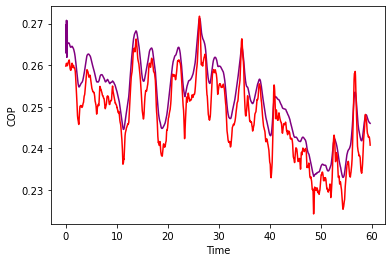

In [35]:
plt.plot(t[:-30],COPX3, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPX3real[30:], marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [36]:
COPX3med=np.mean(COPX3)
COPX3realmed=np.mean(COPX3real)
ex3=np.square((COPX3med-COPX3realmed)**2)
print(ex3)

3.5864332893625877e-10


Text(0, 0.5, 'COP')

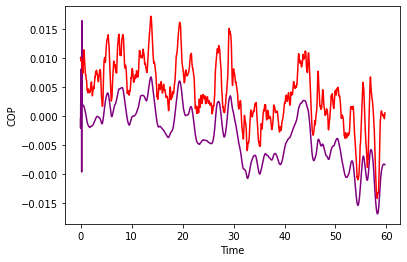

In [37]:
plt.plot(t[:-30],COPZ3,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZ3real[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [38]:
COPZ3med=np.mean(COPZ3)
COPZ3realmed=np.mean(COPZ3real)
ez3=np.sqrt((COPZ3med-COPZ3realmed)**2)
print(ez3)

0.00712572112043559


## Subject 3

In [39]:
fname_grf4=os.path.join(path2,PDSinfo.Trial[3]+'grf'+'.txt')
fname_mkr4=os.path.join(path2,PDSinfo.Trial[3]+'mkr'+'.txt')
grf4=pd.read_csv(fname_grf4,delimiter='\t',header=0,engine='c')
mkr4=pd.read_csv(fname_mkr4,delimiter='\t',header=0,engine='c')

In [40]:
COGX4=mkr4['COG_X']
COGY4=mkr4['COG_Y']
COGZ4=mkr4['COG_Z']
d4=(COGX4**2+COGY4*2+COGZ4**2)**0.5

In [41]:
angulox4=np.arcsin(COGX4/d4)
anguloz4=np.arcsin(COGZ4/d4)
matrizangx4=np.array(angulox4[30:])
matrizangz4=np.array(anguloz4[30:])

In [42]:
t4=grf4['Time']
dt4=t4[1]-t4[0]
d1x4=np.zeros(len(matrizangx4))
d1z4=np.zeros(len(matrizangz4))
for i in range(0,len(matrizangx4)-1):
    prox=i+1
    d1x4[i]=(matrizangx4[prox]-matrizangx4[i])/dt4
    d1z4[i]=(matrizangz4[prox]-matrizangz4[i])/dt4

In [43]:
d2x4=np.zeros(len(d1x4))
d2z4=np.zeros(len(d1z4))
for i in range(0,30):
    prox=i+1
    d2x4[i]=(d1x4[prox]-d1x4[i])/dt4
    d2z4[i]=(d2z4[prox]-d2z4[i])/dt4

In [44]:
COPX4= COGX4[30:] -(4/3)*(d4[30:]**4)*(1/9.8)*d2x4
COPZ4= COGZ4[30:] -(4/3)*(d4[30:]**4)*(1/9.8)*d2z4

In [45]:
COPX4real=grf4['COPNET_X']
COPZ4real=grf4['COPNET_Z']

Text(0, 0.5, 'COP')

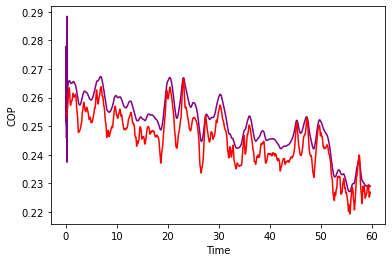

In [46]:
plt.plot(t[:-30],COPX4,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPX4real[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [47]:
COPX4med=np.mean(COPX4)
COPX4realmed=np.mean(COPX4real)
ex4=np.sqrt((COPX4med-COPX4realmed)**2)
print(ex4)

0.00555374496822672


Text(0, 0.5, 'COP')

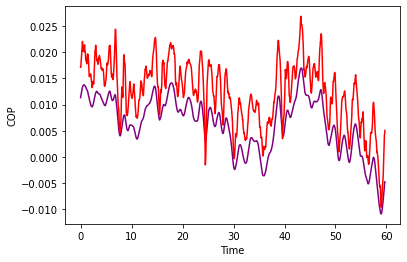

In [48]:
plt.plot(t[:-30],COPZ4,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZ4real[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

   Mean Square Error

In [49]:
COPZ4med=np.mean(COPZ4)
COPZ4realmed=np.mean(COPZ4real)
ez4=np.sqrt((COPZ4med-COPZ4realmed)**2)
print(ez4)

0.006081197718592909


## Subject 63

In [50]:
fname_grf5=os.path.join(path2,PDSinfo.Trial[63]+'grf'+'.txt')
fname_mkr5=os.path.join(path2,PDSinfo.Trial[63]+'mkr'+'.txt')
grf5=pd.read_csv(fname_grf5,delimiter='\t', header=0, engine='c')
mkr5=pd.read_csv(fname_mkr5,delimiter='\t', header=0, engine='c')

In [51]:
COGX5=mkr5['COG_X']
COGY5=mkr5['COG_Y']
COGZ5=mkr5['COG_Z']
d5=(COGX5**2+COGY5**2+COGZ5**2)**0.5

In [52]:
angulox5=np.arcsin(COGX5/d5)
anguloz5=np.arcsin(COGZ5/d5)
matrizangx5=np.array(angulox5[30:])
matrizangz5=np.array(anguloz5[30:])

In [53]:
t5=grf5['Time']
dt5=t5[1]-t5[0]
d1x5=np.zeros(len(matrizangx5))
d1z5=np.zeros(len(matrizangz5))
for i in range(0,len(matrizangx5)-1):
    prox=i+1
    d1x5[i]=(matrizangx5[prox]-matrizangx5[i])/dt5
    d1z5[i]=(matrizangz5[prox]-matrizangz5[i])/dt5

In [54]:
d2x5=np.zeros(len(d1x5))
d2z5=np.zeros(len(d1z5))
for i in range(0,30):
    prox=i+1
    d2x5[i]=(d1x5[prox]-d1x5[i])/dt5
    d2z5[i]=(d1z5[prox]-d1z5[i])/dt5

In [55]:
COPX5= COGX5[30:]- (4/3)*(d5[30:]**4)*(1/9.8)*d2x5
COPZ5= COGZ5[30:]-(4/3)*(d5[30:]**4)*(1/9.8)*d2z5

In [56]:
COPXreal5=grf5['COPNET_X']
COPZreal5=grf5['COPNET_Z']

Text(0, 0.5, 'COP')

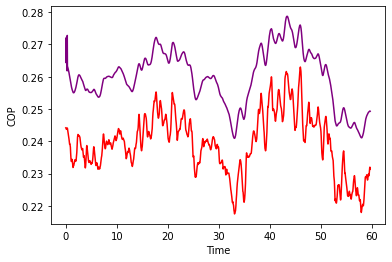

In [57]:
plt.plot(t[:-30],COPX5, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal5[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [58]:
COPX5med=np.mean(COPX5)
COPXreal5=np.mean(COPXreal5)
ex5=np.square((COPX5med-COPXreal5)**2)
print(ex5)

1.734003013315523e-07


Text(0, 0.5, 'COP')

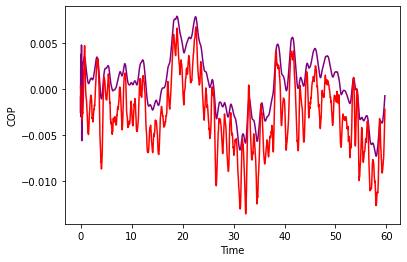

In [59]:
plt.plot(t[:-30],COPZ5, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal5[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

Mean Square Error

In [60]:
COPZ5med=np.mean(COPZ5)
COPZreal5med=np.mean(COPZreal)
ez5=np.sqrt((COPZ5med-COPZreal5med)**2)
print(ez5)

NameError: name 'COPZreal' is not defined


## Subject 77

In [61]:
fname_grf6=os.path.join(path2,PDSinfo.Trial[77]+'grf'+'.txt')
fname_mkr6=os.path.join(path2,PDSinfo.Trial[77]+'mkr'+'.txt')
grf6=pd.read_csv(fname_grf6,delimiter='\t',header=0,engine='c')
mkr6=pd.read_csv(fname_mkr6,delimiter='\t',header=0,engine='c')

In [62]:
COGX6=mkr6['COG_X']
COGY6=mkr6['COG_Y']
COGZ6=mkr6['COG_Z']
d6=(COGX6**2+COGY6**2+COGZ6**2)**0.5

In [63]:
angulox6=np.arcsin(COGX6/d6)
anguloz6=np.arcsin(COGZ6/d6)
matrizangx6=np.array(angulox6[30:])
matrizangz6=np.array(anguloz6[30:])

In [64]:
t6=grf6['Time']
dt6=t6[1]-t6[0]
d1x6=np.zeros(len(matrizangx6))
d1z6=np.zeros(len(matrizangz6))
for i in range(0,len(matrizangx6)-1):
    prox=i+1
    d1x6[i]=(matrizangx6[prox]-matrizangx[i])/dt6
    d1z6[i]=(matrizangz6[prox]-matrizangz6[i])/dt6

In [65]:
d2x6=np.zeros(len(d1x6))
d2z6=np.zeros(len(d1z6))
for i in range(0,30):
    prox=i+1
    d2x6[i]=(d1x6[prox]-d1x6[i])/dt6
    d2z6[i]=(d1z6[prox]-d1z6[i])/dt6

In [66]:
COPX6= COGX6[30:]-(4/3)*(d6[30:]**4)*(1/9.8)*d2x6
COPZ6= COGZ6[30:]-(4/3)*(d6[30:]**4)*(1/9.8)*d2z6

In [67]:
COPXreal6=grf6['COPNET_X']
COPZreal6=grf6['COPNET_Z']

Text(0, 0.5, 'COP')

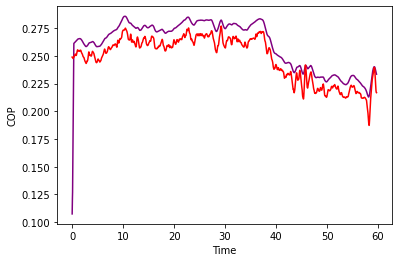

In [68]:
plt.plot(t[:-30],COPX6,marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal6[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [69]:
COPX6med=np.mean(COPX6)
COPXreal6med=np.mean(COPXreal6)
ex6=np.sqrt((COPX6med-COPXreal6med)**2)
print(ex6)

0.011959444425337223


Text(0, 0.5, 'COP')

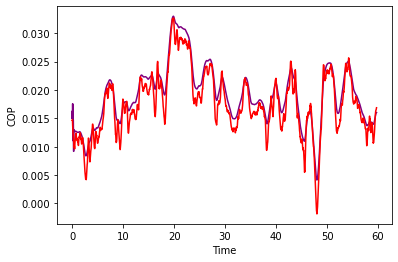

In [70]:
plt.plot(t[:-30],COPZ6, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPZreal6[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [71]:
COPZ6med=np.mean(COPZ6)
COPZreal6med=np.mean(COPZreal6)
ez6=np.sqrt((COPZ6med-COPZreal6med)**2)
print(ez6)

0.0015871257724472468


## Subject 16

In [72]:
fname_grf7=os.path.join(path2,PDSinfo.Trial[16]+'grf' + '.txt')
fname_mkr7=os.path.join(path2,PDSinfo.Trial[16]+'mkr'+ '.txt')
grf7=pd.read_csv(fname_grf7,delimiter='\t',header=0,engine='c')
mkr7=pd.read_csv(fname_mkr7,delimiter='\t',header=0,engine='c')

In [73]:
COGX7=mkr7['COG_X']
COGY7=mkr7['COG_Y']
COGZ7=mkr7['COG_Z']
d7=(COGX7**2+COGY7**2+COGZ7**2)*0.5

In [74]:
angulox7=np.arcsin(COGX7/d7)
anguloz7=np.arcsin(COGZ7/d7)
matrizangx7=np.array(angulox7[30:])
matrizangz7=np.array(anguloz7[30:])

In [75]:
t7=grf7['Time']
dt7=t7[1]-t7[0]
d1x7=np.zeros(len(matrizangx7))
d1z7=np.zeros(len(matrizangz7))
for i in range(0,len(matrizangx7)-1):
    prox=i+1
    d1x7[i]=(matrizangx7[prox]-matrizangx7[i])/dt7
    d1z7[i]=(matrizangz7[prox]-matrizangz7[i])/dt7

In [76]:
d2x7=np.zeros(len(d1x7))
d2z7=np.zeros(len(d1z7))
for i in range(0,30):
    prox=i+1
    d2x7=(d1x7[prox]-d1x7[i])/dt7
    d2z7=(d1z7[prox]-d1z7[i])/dt7

In [77]:
COPX7= COGX7[30:] - (4/3)*(d7[30:]**4)*(1/9.8)*d2x7
COPZ7= COGZ7[30:] - (4/3)*(d7[30:]**4)*(1/9.8)*d2z7

In [78]:
COPXreal7=grf7['COPNET_X']
COPZreal7=grf7['COPNET_Z']

Text(0, 0.5, 'COP')

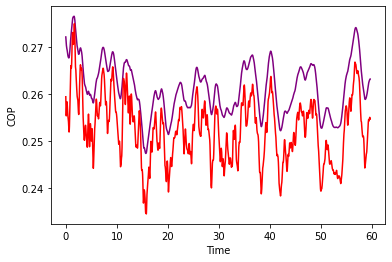

In [79]:
plt.plot(t[:-30],COPX7, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal7[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [80]:
COPX7med=np.mean(COPX7)
COPXreal7med=np.mean(COPXreal7)
ex7=np.sqrt((COPX7med-COPXreal7med)**2)
print(ex7)

0.0087409567977077


Text(0, 0.5, 'COP')

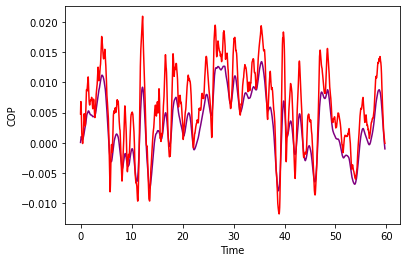

In [81]:
plt.plot(t[:-30], COPZ7, marker='',color='purple',linestyle='-')
plt.plot(t[:-30], COPZreal7[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [82]:
COPZ7med=np.mean(COPZ7)
COPZreal7med=np.mean(COPZreal7)
ez7=np.sqrt((COPZ7med-COPZreal7med)**2)
print(ez7)

0.002973153164099964


## Subject 47

Getting the data:

In [83]:
fname_grf8=os.path.join(path2,PDSinfo.Trial[47]+'grf'+'.txt')
fname_mkr8=os.path.join(path2,PDSinfo.Trial[47]+'mkr'+'.txt')
grf8=pd.read_csv(fname_grf8,delimiter='\t',header=0,engine='c')
mkr8=pd.read_csv(fname_mkr8,delimiter='\t', header=0, engine='c')

Getting the COG data and calculating the distance:

In [84]:
COGX8=mkr8['COG_X']
COGY8=mkr8['COG_Y']
COGZ8=mkr8['COG_Z']
d8=(COGX8**2+COGY8**2+COGZ8**2)**0.5

Calculating the angles:

In [85]:
angulox8=np.arcsin(COGX8/d8)
anguloz8=np.arcsin(COGZ8/d8)
matrizangx8=np.array(angulox8[30:])
matrizangz8=np.array(anguloz8[30:])

Now we calculate the first derivative

In [86]:
t8=grf8['Time']
dt8=t8[1]-t8[0]
d1x8=np.zeros(len(matrizangx8))
d1z8=np.zeros(len(matrizangz8))
for i in range(0,len(matrizangx8)-1):
    prox=i+1
    d1x8[i]=(matrizangx8[prox]-matrizangx8[i])/dt8
    d1z8[i]=(matrizangz8[prox]-matrizangz8[i])/dt8

For the second derivative:

In [87]:
d2x8=np.zeros(len(d1x8))
d2z8=np.zeros(len(d1z8))
for i in range(0,30):
    prox=i+1
    d2x8[i]=(d1x8[prox]-d1x8[i])/dt8
    d2z8[i]=(d1z8[prox]-d1z8[i])/dt8

Now we calculate the equation in question:

In [88]:
COPX8= COGX8[30:] -(4/3)*(d8[30:]**4)*(1/9.8)*d2x8
COPZ8= COGZ8[30:] -(4/3)*(d8[30:]**4)*(1/9.8)*d2z8

In [89]:
COPXreal8=grf8['COPNET_X']
COPZreal8=grf8['COPNET_Z']

Text(0, 0.5, 'COP')

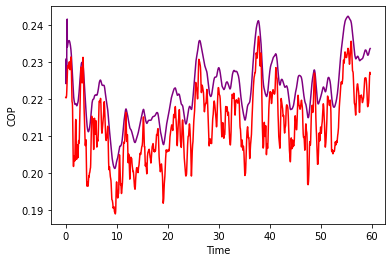

In [90]:
plt.plot(t[:-30],COPX8, marker='',color='purple',linestyle='-')
plt.plot(t[:-30],COPXreal8[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [91]:
COPX8med=np.mean(COPX8)
COPXreal8med=np.mean(COPXreal8)
ex8=np.sqrt((COPX8med-COPXreal8med)**2)
print(ex8)

0.009317198892895756


Text(0, 0.5, 'COP')

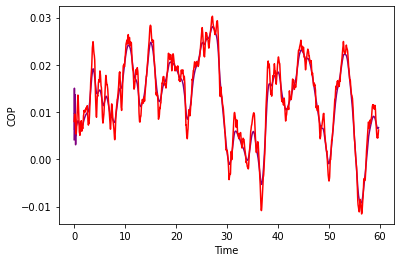

In [92]:
plt.plot(t[:-30],COPZ8,marker='', color='purple', linestyle='-')
plt.plot(t[:-30],COPZreal8[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [93]:
COPZ8med=np.mean(COPZ8)
COPZreal8med=np.mean(COPZreal8)
ez8=np.sqrt((COPZ8med-COPZreal8med)**2)
print(ez8)

0.0004081325929012232


## Subject 10

Getting the data:

In [94]:
fname_grf9=os.path.join(path2,PDSinfo.Trial[10]+'grf'+'.txt')
fname_mkr9=os.path.join(path2,PDSinfo.Trial[10]+'mkr'+'.txt')
grf9=pd.read_csv(fname_grf9,delimiter='\t', header=0,engine='c')
mkr9=pd.read_csv(fname_mkr9,delimiter='\t', header=0, engine='c')

Getting the COG data and calculating the distance:

In [95]:
COGX9=mkr9['COG_X']
COGY9=mkr9['COG_Y']
COGZ9=mkr9['COG_Z']
d9=(COGX9**2+COGY9**2+COGZ9**2)**0.5

Calculating the angles:

In [96]:
angulox9=np.arcsin(COGX9/d9)
anguloz9=np.arcsin(COGZ9/d9)
matrizangx9=np.array(COGX9[30:])
matrizangz9=np.array(COGZ9[30:])

Now we calculate the first derivative

In [97]:
t9=grf9['Time']
dt9=t9[1]-t9[0]
d1x9=np.zeros(len(matrizangx9))
d1z9=np.zeros(len(matrizangz9))
for i in range(0,len(matrizangx9)-1):
    prox=i+1
    d1x9[i]=(matrizangx9[prox]-matrizangx9[i])/dt9
    d1z9[i]=(matrizangz9[prox]-matrizangz9[i])/dt9

Now we calculate the second derivative

In [98]:
d2x9=np.zeros(len(d1x9))
d2z9=np.zeros(len(d1z9))
for i in range(0,30):
    prox=i+1
    d2x9[i]=(d1x9[prox]-d1x9[i])/dt9
    d2z9[i]=(d1z9[prox]-d1z9[i])/dt9

With the second derivative it is possible to use the equation

In [99]:
COPX9=COGX9[30:]-(4/3)*(d9[30:]**4)*(1/9.8)*d2x9
COPZ9=COGZ9[30:]-(4/3)*(d9[30:]**4)*(1/9.8)*d2z9

In [100]:
COPXreal9=grf9['COPNET_X']
COPZreal9=grf9['COPNET_Z']

Text(0, 0.5, 'COP')

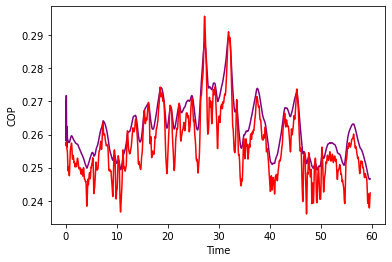

In [101]:
plt.plot(t9[:-30],COPX9,marker='',color='purple',linestyle='-')
plt.plot(t9[:-30],COPXreal9[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [102]:
COPX9med=np.mean(COPX9)
COPXreal9med=np.mean(COPXreal)
ex9=np.sqrt((COPX9med-COPXreal9med)**2)
print(ex9)

NameError: name 'COPXreal' is not defined

In [ ]:
plt.plot(t9[:-30],COPZ9,marker='',color='purple',linestyle='-')
plt.plot(t9[:-30],COPZreal9[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [103]:
COPZ9med=np.mean(COPZ9)
COPZreal9med=np.mean(COPZreal9)
ex9=np.sqrt((COPZ9med-COPZreal9med)**2)
print(ex9)

0.006641770847451015


## Subject 19

Collect the data

In [104]:
fname_grf10=os.path.join(path2,PDSinfo.Trial[9]+'grf'+'.txt')
fname_mkr10=os.path.join(path2,PDSinfo.Trial[9]+'mkr'+'.txt')
grf10=pd.read_csv(fname_grf10, delimiter='\t', header=0, engine='c')
mkr10=pd.read_csv(fname_mkr10, delimiter='\t', header=0, engine='c')

Collect the COG data and distance

In [105]:
COGX10=mkr10['COG_X']
COGY10=mkr10['COG_Y']
COGZ10=mkr10['COG_Z']
d10=(COGX10**2+COGY10**2+COGZ10**2)**0.5

Calculating the angles:

In [106]:
angulox10=np.arcsin(COGX10/d10)
anguloz10=np.arcsin(COGZ10/d10)
matrizangx10=np.array(angulox10[30:])
matrizangz10=np.array(anguloz10[30:])

After that is calculated the first derivative:

In [107]:
t10=grf10['Time']
dt10=t10[1]-t10[0]
d1x10=np.zeros(len(matrizangx10))
d1z10=np.zeros(len(matrizangz10))
for i in range(0,len(matrizangx10)-1):
    prox=i+1
    d1x10[i]=(matrizangx10[prox]-matrizangx10[i])/dt10
    d1z10[i]=(matrizangz10[prox]-matrizangz10[i])/dt10

Now it is possible to have the second derivative

In [108]:
d2x10=np.zeros(len(d1x10))
d2z10=np.zeros(len(d1z10))
for i in range(0,30):
    prox=i+1
    d2x10[i]=(d1x10[prox]-d1x10[i])/dt10
    d2z10[i]=(d1z10[prox]-d1z10[i])/dt10

And it is possible to calculate the estimative COP

In [109]:
COPX10= COGX10[30:]-(4/3)*(d10[30:]**4)*(1/9.8)*d2x10
COPZ10= COGZ10[30:]-(4/3)*(d10[30:]**4)*(1/9.8)*d2z10

For the graphics we can take the real values for COP

In [110]:
COPXreal10=grf10['COPNET_X']
COPZreal10=grf10['COPNET_Z']

We can have the graphics now

Text(0, 0.5, 'COP')

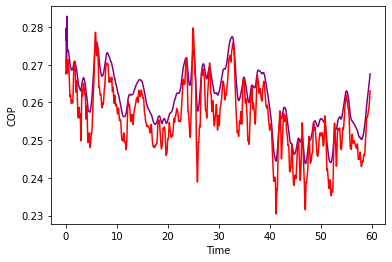

In [111]:
plt.plot(t10[:-30],COPX10,marker='',color='purple',linestyle='-')
plt.plot(t10[:-30],COPXreal10[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [112]:
COPX10med=np.mean(COPX10)
COPXreal10med=np.mean(COPXreal10)
ex10=np.sqrt((COPX10med-COPXreal10med)**2)
print(ex10)

0.005042442294573013


Text(0, 0.5, 'COP')

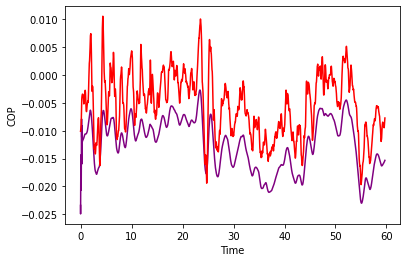

In [113]:
plt.plot(t10[:-30],COPZ10,marker='',color='purple',linestyle='-')
plt.plot(t10[:-30],COPZreal10[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [114]:
COPZ10med=np.mean(COPZ10)
COPZreal10med=np.mean(COPZreal10)
ez10=np.sqrt((COPZ10med-COPZreal10med)**2)
print(ez10)

0.0069788604491541305


## Subject 12

Collecting the data:

In [115]:
fname_grf11=os.path.join(path2,PDSinfo.Trial[12]+'grf'+'.txt')
fname_mkr11=os.path.join(path2,PDSinfo.Trial[12]+'mkr'+'.txt')
grf11=pd.read_csv(fname_grf11,delimiter='\t',header=0,engine='c')
mkr11=pd.read_csv(fname_mkr11,delimiter='\t',header=0,engine='c')

Collecting COG data and distance

In [116]:
COGX11=mkr11['COG_X']
COGY11=mkr11['COG_Y']
COGZ11=mkr11['COG_Z']
d11=(COGX11**2+COGY11**2+COGZ11**2)**0.5

Collecting the angles:

In [117]:
angulox11=np.arcsin(COGX10/d11)
anguloz11=np.arcsin(COGZ10/d11)
matrizangx11=np.array(angulox11[30:])
matrizangz11=np.array(anguloz11[30:])

Calculating the first derivative:

In [118]:
t11=grf11['Time']
dt11=t11[1]-t11[0]
d1x11=np.zeros(len(matrizangx11))
d1z11=np.zeros(len(matrizangz11))
for i in range(0,len(matrizangx11)-1):
    prox=i+1
    d1x11[i]=(matrizangx11[prox]-matrizangx11[i])/dt11
    d1z11[i]=(matrizangz11[prox]-matrizangz11[i])/dt11

For the second derivative:

In [119]:
d2x11=np.zeros(len(d1x11))
d2z11=np.zeros(len(d1z11))
for i in range(0,30):
    prox=i+1
    d2x11[i]=(d1x11[prox]-d1x11[i])/dt11
    d2z11[i]=(d1z11[prox]-d1z11[i])/dt11

Calculating the COP estimation:

In [120]:
COPX11=COGX11[30:]-(4/3)*(d11[30:]**4)*(1/9.8)*d2x11
COPZ11=COGZ11[30:]-(4/3)*(d11[30:]**4)*(1/9.8)*d2z11

The actual values of the COP:

In [121]:
COPXreal11=grf11['COPNET_X']
COPZreal11=grf11['COPNET_Z']

Text(0, 0.5, 'COP')

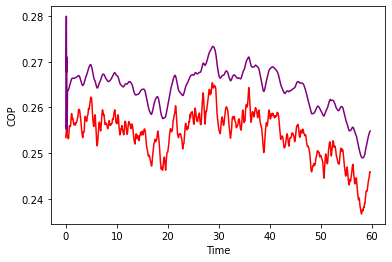

In [122]:
plt.plot(t11[:-30],COPX11,marker='',color='purple',linestyle='-')
plt.plot(t11[:-30],COPXreal11[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [123]:
COPX11med=np.mean(COPX11)
COPXreal11med=np.mean(COPXreal11)
ex11=np.sqrt((COPX11med-COPXreal11med)**2)
print(ex11)

0.009942645475661205


Text(0, 0.5, 'COP')

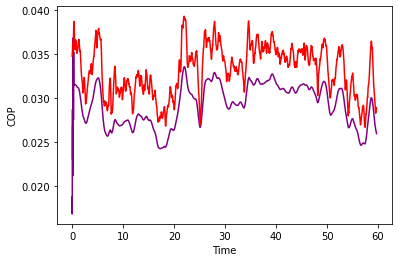

In [124]:
plt.plot(t11[:-30],COPZ11,marker='',color='purple',linestyle='-')
plt.plot(t11[:-30],COPZreal11[30:],marker='',color='red',linestyle='-')
plt.xlabel('Time')
plt.ylabel('COP')

In [125]:
COPZ11med=np.mean(COPZ11)
COPZreal11med=np.mean(COPZreal11)
ez11=np.sqrt((COPZ11med-COPZreal11med)**2)
print(ez11)

0.00395182162992137
